# NumPy Scientific Library

Credit to original content: [Real Python](https://realpython.com/numpy-array-programming/), [NumPy](https://numpy.org/)

NumPy is a foundational package for scientific computation, three main concepts power NumPy's library:

* Vectorization
* Broadcasting
* Indexing

I'll walk through the basics of the package below and implement the concepts throughout different project tasks.

## ndarrays
NumPy's framework is built off of the ndarray object (numpy.array). This data type is fundamental to conceptual mathematics and is implemented in various array-oriented programming languages such as Fortran 90, R, and MATLAB.

Arrays can be thought of as containers for grids of information. The ndarray class in numpy is used for arrays of any dimension, it contains a built in *shape* method that describes the array. Different terminology is used to describe arrays based on their shape. Typically, an array with a single dimension is called a *vector*, while a *matrix* refers to a two dimensional array. Arrays that have 3 or more dimensions are referred to as *tensors*. Within a given array are stored *elements* that are indexed at specific memory locations.

You can picture this vusually below:

![](https://i.pinimg.com/736x/a4/58/9d/a4589d10dc802ea7bd11b51cbc921d1a.jpg)

In [1]:
import numpy as np

vector = np.array([3, 2])
matrix = np.array([[1, 0, 1], [3, 4, 1]])
tensor = np.arange(36).reshape(3, 4, 3)

print(type(vector), vector.ndim, vector.shape)
print(type(matrix), matrix.ndim, matrix.shape)
print(type(tensor), tensor.ndim, tensor.shape)

<class 'numpy.ndarray'> 1 (2,)
<class 'numpy.ndarray'> 2 (2, 3)
<class 'numpy.ndarray'> 3 (3, 4, 3)


In [2]:
# access the first element in each ndarray
print(vector[0])
print(matrix[0])
print(tensor[0])

3
[1 0 1]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


## Search and Sorting
NumPy provides built in [sorting]() methods help with data cleaning and manipulation. You can specify the axis, kind, and order when you call the sort function.

In addition to the basic sort function, NumPy offers:
* [argsort]() - indirect sort along a specified axis
* [lexsort]() - indirect stable sort on multiple keys
* [searchsorted]() - find elements in a sorted array
* [partition]() - partial sort

In [3]:
# consider the following array
vector = np.array([10, 2, 5, 3, 1, 15])
np.sort(vector)

array([ 1,  2,  3,  5, 10, 15])

## Vectorization
Vectorization is the practice for replacing explicit loops with array expressions. These operations are typically magnitudes faster than the pure python equivalent because NumPy is delegating the looping mechanics to optimized C and Fortran functions.

Consider the following vector of boolean values, where the count is a relevant return value.

In [4]:
np.random.seed(444)
x = np.random.choice([False, True], size=100000)
print(x)

[ True False  True ...  True False  True]


In [5]:
# traditional python for loop
def count_transitions(x) -> int:
    count = 0
    for i, j in zip(x[:-1], x[1:]):
        if j and not i:
            count += 1
    return count

count_transitions(x)

24984

In [6]:
# vectorized
np.count_nonzero(x[:-1] < x[1:])

24984

In [7]:
# efficiency gain
from timeit import timeit
setup = 'from __main__ import count_transitions, x; import numpy as np'
num = 1000
t1 = timeit('count_transitions(x)', setup=setup, number=num)
t2 = timeit('np.count_nonzero(x[:-1] < x[1:])', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(t1 / t2))

Speed difference: 568.4x


# Stock Tracking with Numpy
Given a stock's price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.

In [8]:
# traditional for loop (O(n^2) time complexity)
def profit(prices):
    max_px = 0
    min_px = prices[0]
    for px in prices[1:]:
        min_px = min(min_px, px)
        max_px = max(px - min_px, max_px)
    return max_px

prices = (20, 18, 14, 17, 20, 21, 15)
profit(prices)

7

In [9]:
# NumPy example
# create mostly NaN array with a few 'turning points' (local min/max)
prices = np.full(100, fill_value=np.nan)
prices[[0, 25, 60, -1]] = [80., 30., 75., 50.]

# linear interpolation
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2

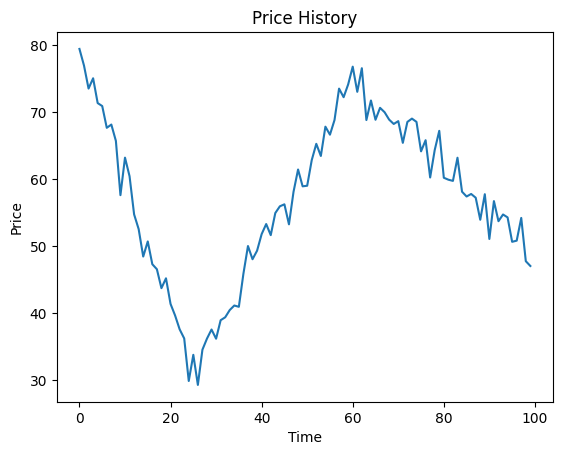

In [10]:
import matplotlib.pyplot as plt

mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 12, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], color='green', **kwargs)
ax.plot(mx, prices[mx], color='red', **kwargs)

In [11]:
cumin = np.minimum.accumulate

def profit_with_numpy(prices):
    prices = np.asarray(prices)
    return np.max(prices - cumin(prices))

print(profit_with_numpy(prices))
np.allclose(profit_with_numpy(prices), profit(prices))

47.51581018762879


True

## Efficiency Comparison

In [12]:
seq = np.random.randint(0, 100, size=100000)

In [13]:
setup = ('from __main__ import profit_with_numpy, profit, seq; import numpy as np')
num = 250
pytime = timeit('profit(seq)', setup=setup, number=num)
nptime = timeit('profit_with_numpy(seq)', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(pytime / nptime))

Speed difference: 158.6x


## Handling Text

[String operations]() in NumPy have a unique module for cleaning data and performing operations quickly. 